In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
avocado_df = pd.read_csv('avocado.csv')

In [3]:
avocado_df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploring the dataset

In [4]:
# Visualize Date - Price 

avocado_df = avocado_df.sort_values('Date')

In [5]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


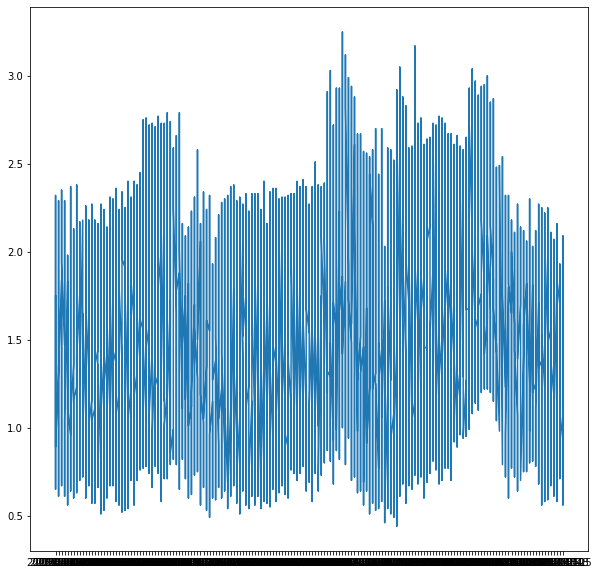

In [6]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

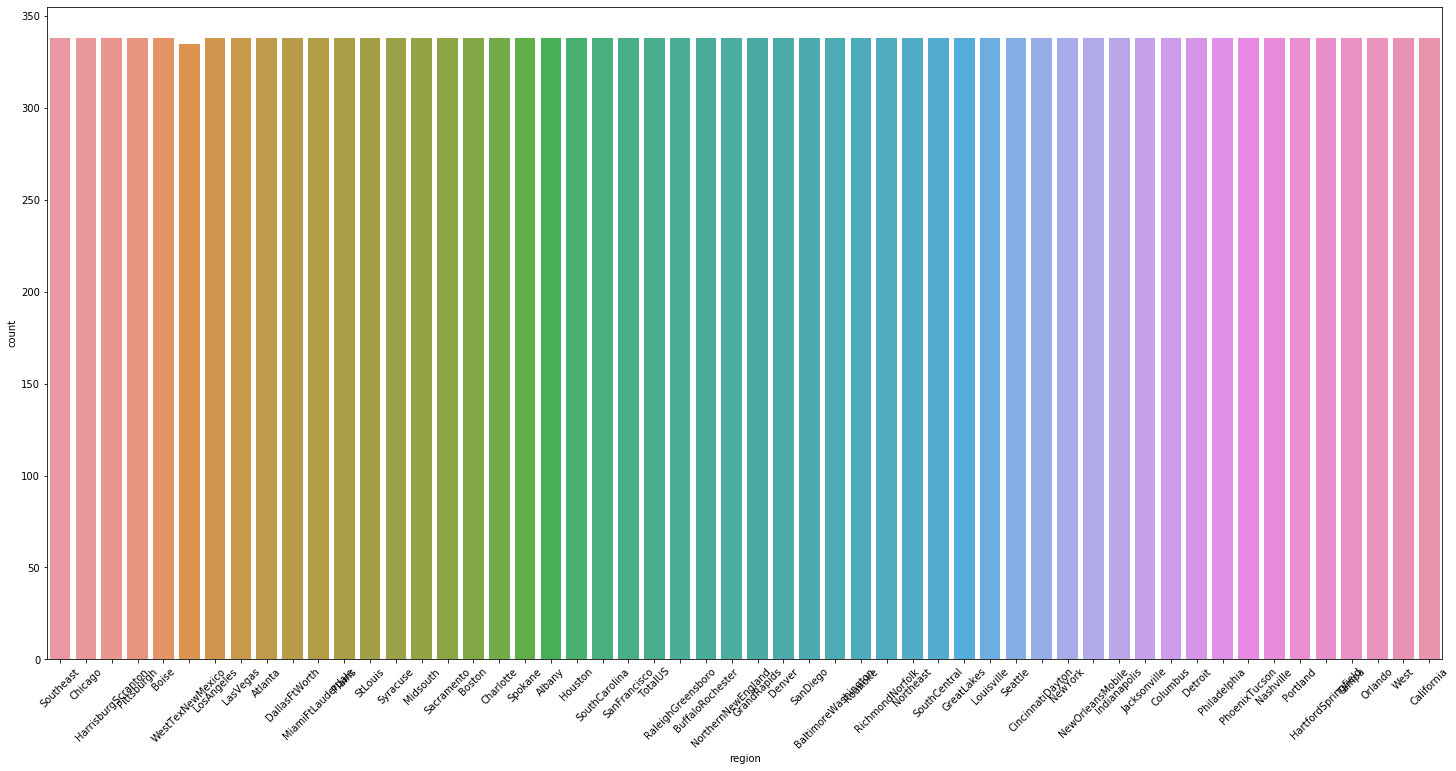

In [7]:
# Visualize Region
plt.figure(figsize=(25,12))
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

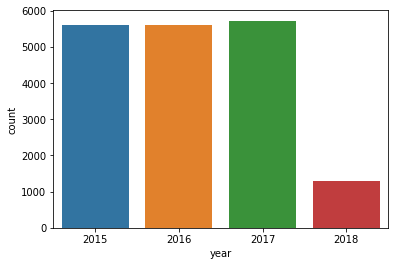

In [8]:
# Visualise the date-sales
sns.countplot(x = 'year', data = avocado_df)

# Creating a new dataframe that has only Date and AveragePrice as they are the only required columns for Prophet operations

In [9]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [10]:
avocado_prophet_df.head(5)

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# Make Predictions

In [11]:
# Rename columns to ds and y for Prophet to operate

avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [12]:
avocado_prophet_df.head(5)

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [13]:
m = Prophet()

m.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [15]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497917,0.909403,1.900226,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
1,2015-01-04,1.497917,0.913905,1.881267,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
2,2015-01-04,1.497917,0.898090,1.838525,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
3,2015-01-04,1.497917,0.906516,1.884105,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
4,2015-01-04,1.497917,0.943114,1.869788,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809


In [16]:
# yhat lower, yhat upper, trend lower, trend upper are Lower Bounds and Upper bounds

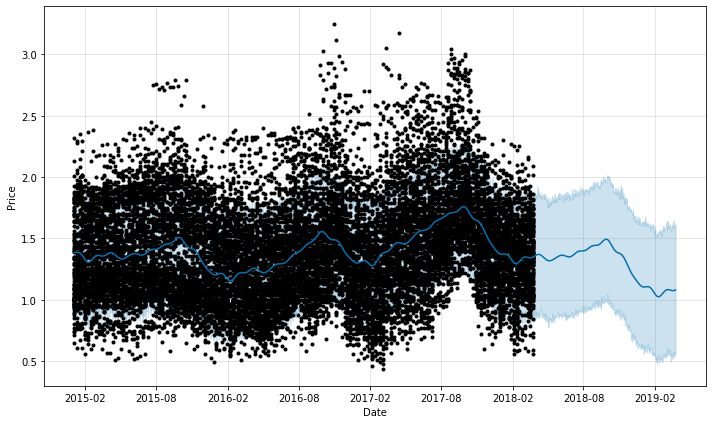

In [17]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

In [18]:
# Black region - Existing data. Blue Region - Future prediction based on trend, seasonality...

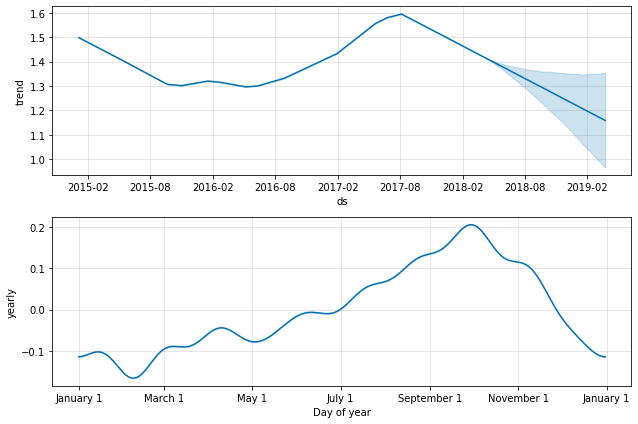

In [19]:
figure = m.plot_components(forecast)

# Make Predictions based on Region

In [20]:
avocado_df_region = avocado_df[avocado_df['region'] == 'West']

In [21]:
avocado_df_region.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


In [22]:
# As our dataframe avocado_df is already sorted, this step is not needed
avocado_df_region = avocado_df_region.sort_values('Date')

In [23]:
avocado_df_region.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


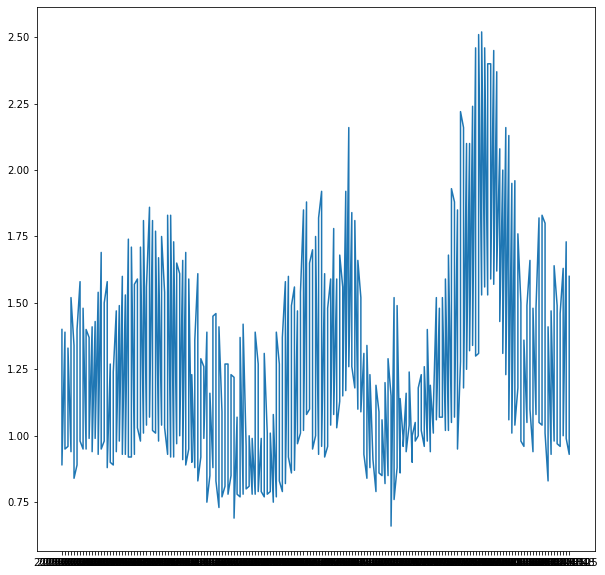

In [24]:
# Visualizing the trend

plt.figure(figsize=(10,10))
plt.plot(avocado_df_region['Date'], avocado_df_region['AveragePrice'])

In [25]:
# Dropping unwanted columns
avocado_df_region = avocado_df_region[['Date','AveragePrice']]
avocado_df_region.head()

,Date,AveragePrice
11881,2015-01-04,1.40
2755,2015-01-04,0.89
11880,2015-01-11,1.39
2754,2015-01-11,0.95
2753,2015-01-18,0.96


In [26]:
# Renaming the columns

avocado_df_region = avocado_df_region.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_df_region.head()

,ds,y
11881,2015-01-04,1.40
2755,2015-01-04,0.89
11880,2015-01-11,1.39
2754,2015-01-11,0.95
2753,2015-01-18,0.96


In [27]:
m2 = Prophet()

In [28]:
m2.fit(avocado_df_region)

future = m2.make_future_dataframe(periods=365)
forecast = m2.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


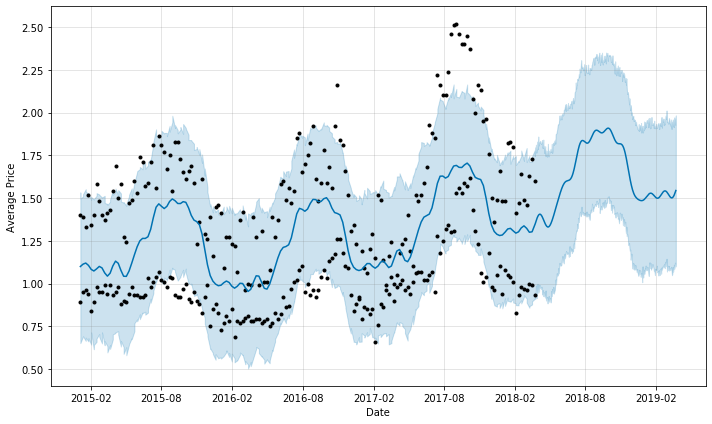

In [29]:
figure = m2.plot(forecast, xlabel='Date', ylabel = 'Average Price')

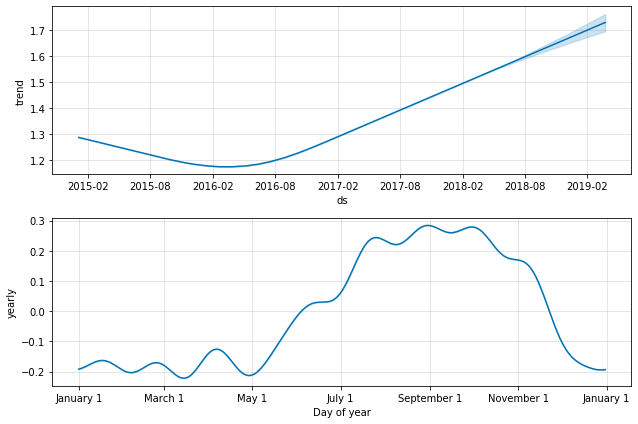

In [30]:
figure = m2.plot_components(forecast)